In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utils.visualize as viz
from utils.ode import map_equation, hydrogen_bromine, hydrogen_bromine_init

%load_ext autoreload
%autoreload 2

In [2]:
dt = 0.002
visualize = viz.ODEResultVisualizer(
    fun=hydrogen_bromine,
    x0=hydrogen_bromine_init,
    t=np.arange(0, 1e1, dt),
    result_dir="../experiments/results/hbr_20250924-122612",
    labels=["Br2", "Br", "H2", "H", "HBr", "M"],
)
visualize.solve()

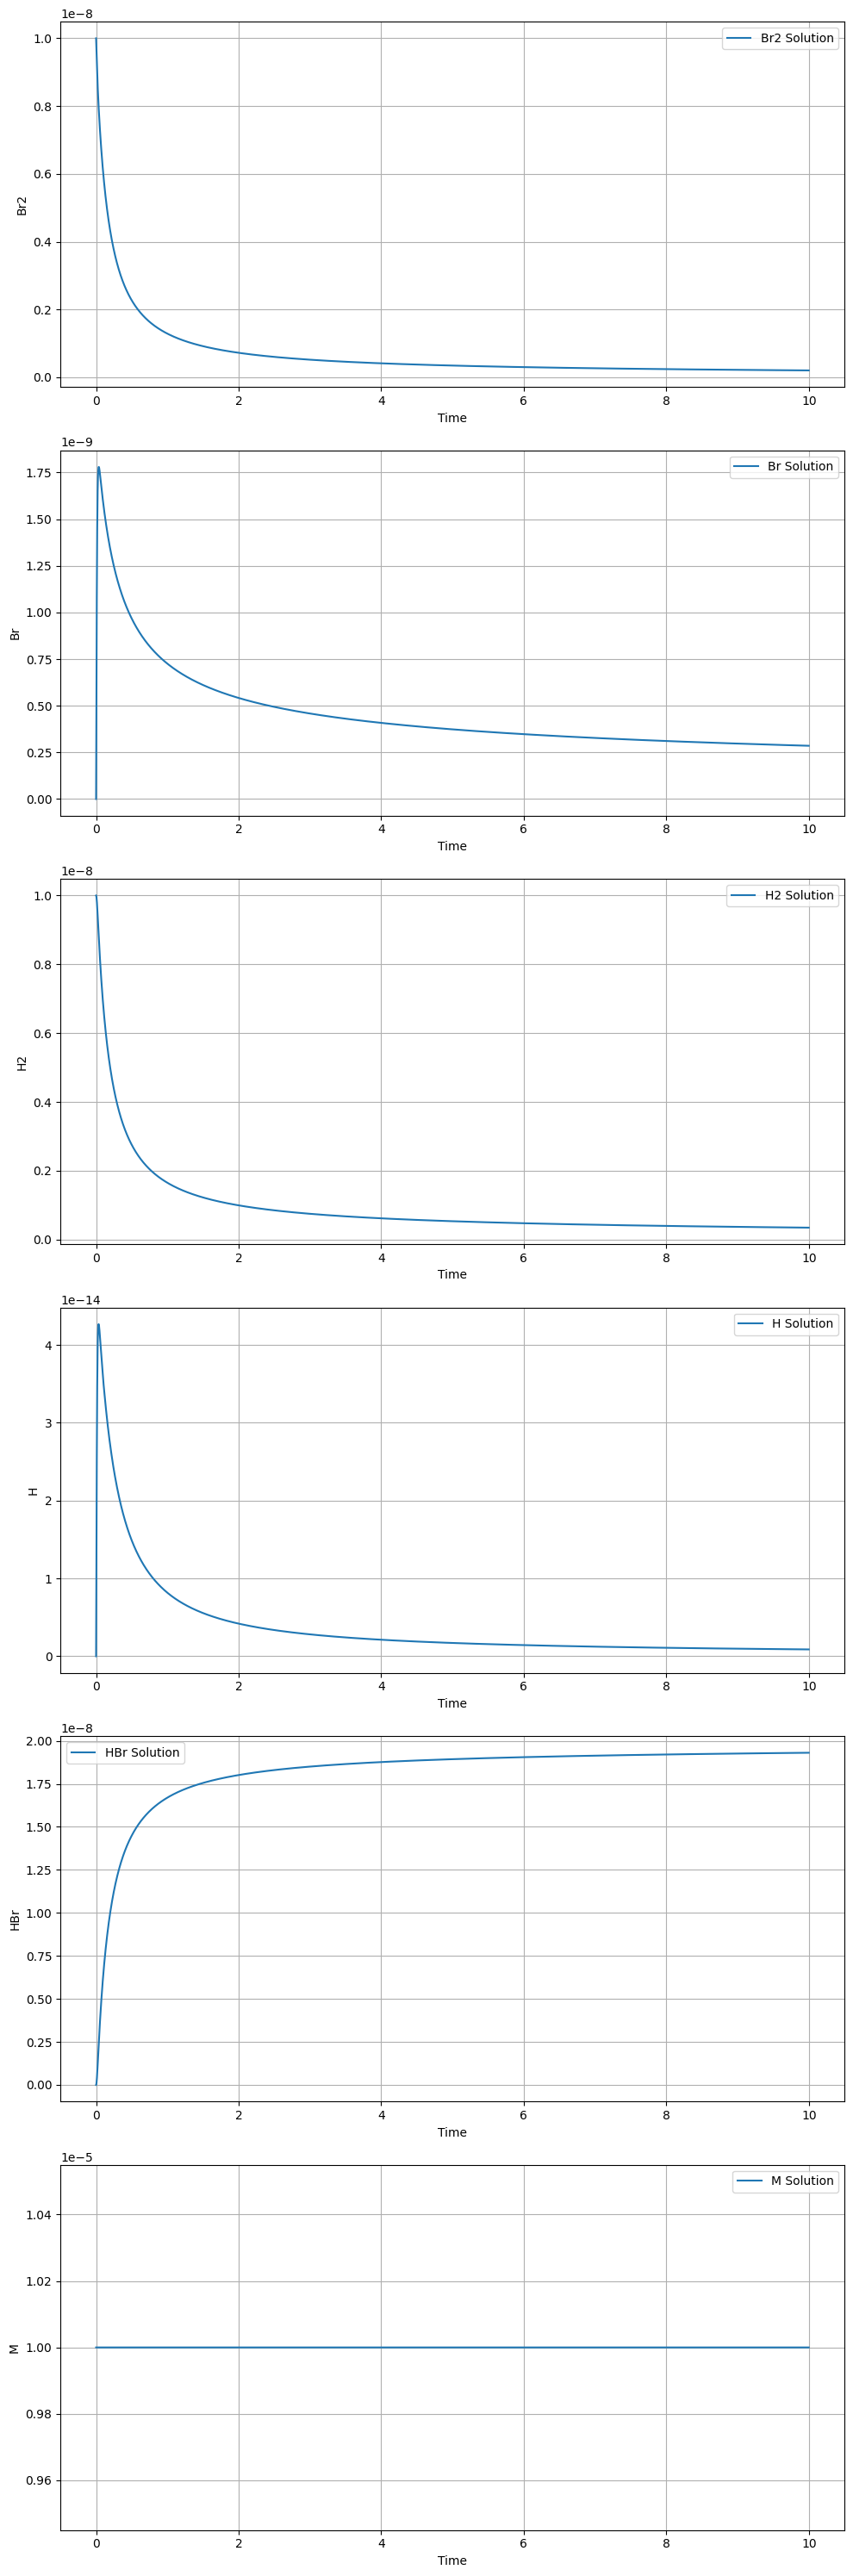

In [3]:
visualize.plot_solution()

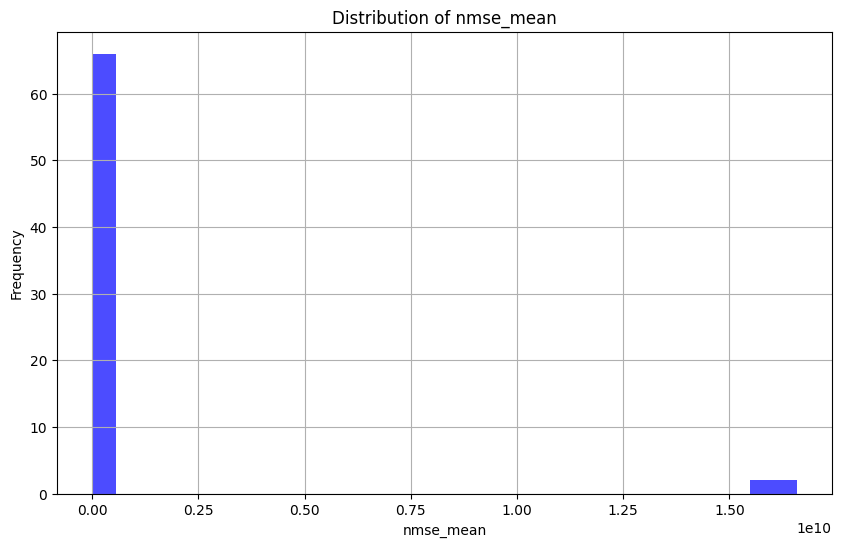

In [4]:
visualize.plot_metric_distribution('nmse_mean')

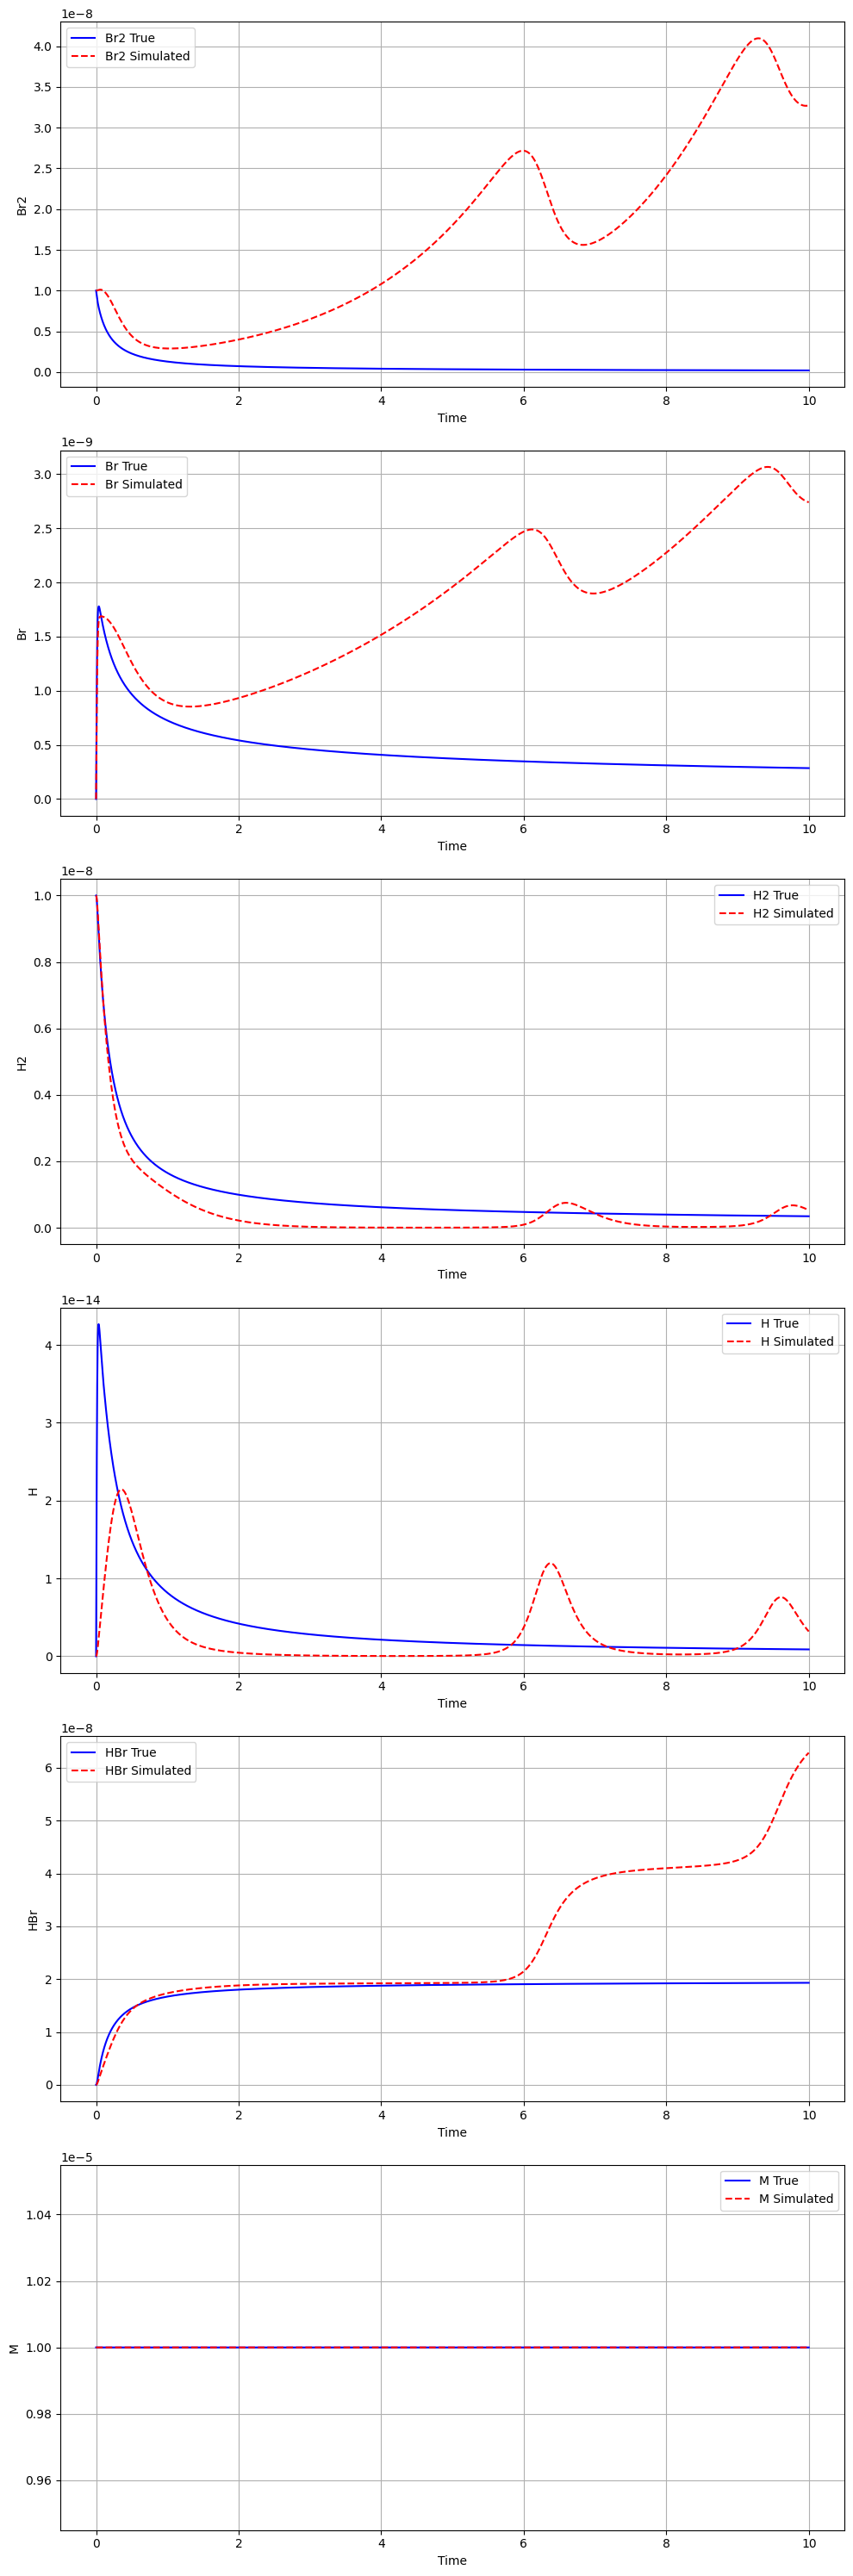

In [5]:
visualize.plot_best_model_solution('nmse_mean')

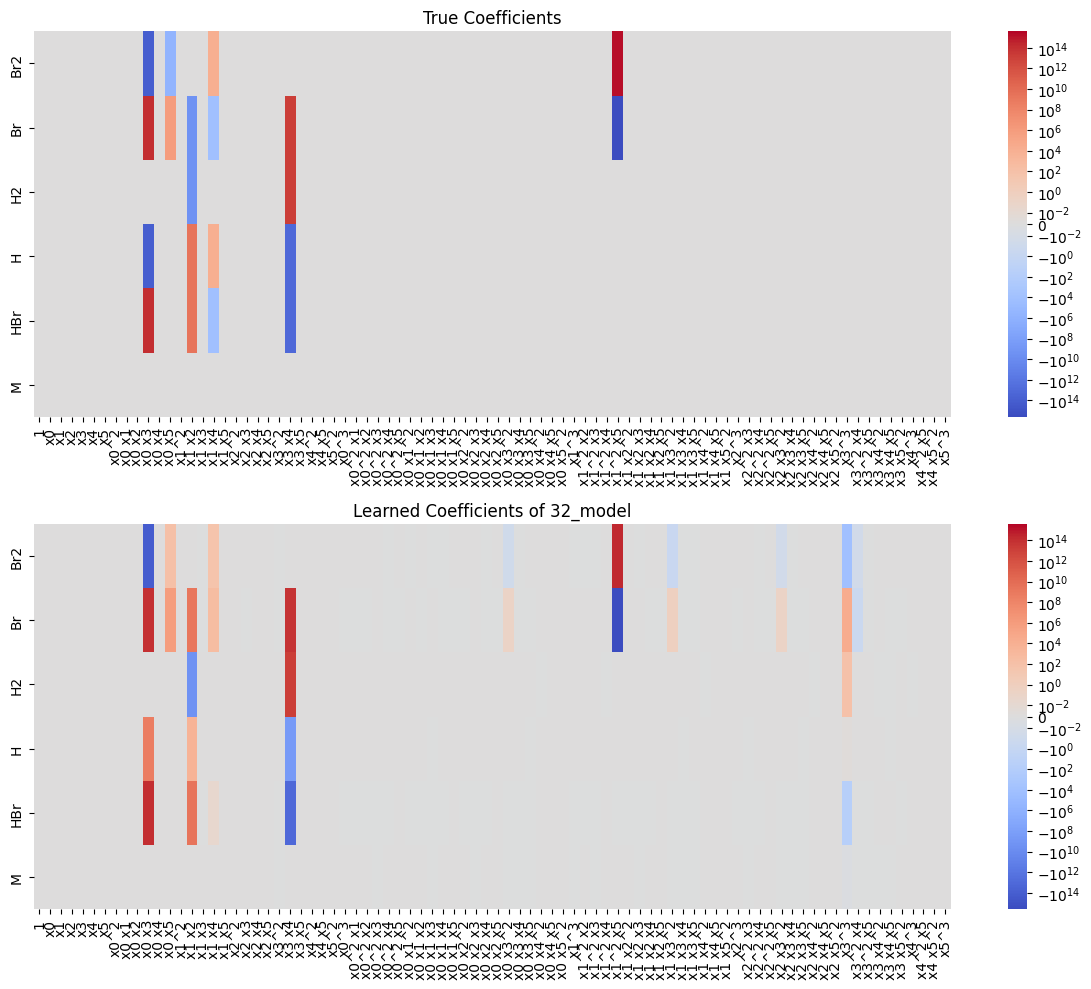

In [6]:
visualize.plot_best_model_coefficients('nmse_mean')